In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV

mort = pd.read_csv('./data/newdata.csv', header=0) # data about mortgage
data_vis = pd.read_csv('./data/newdata.csv', header=0)
mort.head()

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,pur_prc_amt,DTI Ratio,OUTCOME,Median_state_inc
0,37,75650.0,85,669,N,1707,6000,160000,0.284500,non-default,"40,171"
1,46,390775.0,102,684,N,0,5025,309000,0.000000,non-default,"44,228"
2,30,112500.0,90,662,Y,1812,4800,176450,0.377500,non-default,"49,894"
3,24,85250.0,97,647,N,3395,6934,110000,0.489616,non-default,"43,217"
4,35,114000.0,100,791,N,3801,5504,103000,0.690589,non-default,"57,352"


In [2]:
## First_home 문자형 데이터 변환
mort['First_home'] = np.where(mort['First_home']=='Y',1,0)
mort['First_home']

data_vis['First_home'] = np.where(data_vis['First_home']=='Y',1,0)\

## OUTCOME 데이터 변환
mort['OUTCOME'] = np.where(mort['OUTCOME']=='non-default',0,1) # non-default = 0, default = 1

## string 타입을 정수로 변환하기
for k in range(0,10607):
    mort.Median_state_inc[k] = np.float64(mort.Median_state_inc[k].replace(",", ""))
for k in range(0,10607):
    data_vis.Median_state_inc[k] = np.float64(data_vis.Median_state_inc[k].replace(",", ""))

outcome = mort.OUTCOME
mort.drop(['OUTCOME'], axis='columns', inplace=True)

mort

c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,pur_prc_amt,DTI Ratio,Median_state_inc
0,37,75650.0,85,669,0,1707,6000,160000,0.284500,40171
1,46,390775.0,102,684,0,0,5025,309000,0.000000,44228
2,30,112500.0,90,662,1,1812,4800,176450,0.377500,49894
3,24,85250.0,97,647,0,3395,6934,110000,0.489616,43217
4,35,114000.0,100,791,0,3801,5504,103000,0.690589,57352
...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,0.397920,42590
10603,30,57000.0,94,589,0,1703,3941,108000,0.432124,45787
10604,33,153200.0,95,675,1,1726,3707,154000,0.465606,43217
10605,38,158850.0,100,786,1,1364,2500,92000,0.545600,40171


In [ ]:
data_vis

In [ ]:
# X, y = mort, outcome
## training data와 test data 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mort, outcome, test_size=0.25, random_state=0)

In [ ]:
## Standardization
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto', kind='regular')
X_resampled, y_resampled = sm.fit_sample(X_train_std, y_train)

In [ ]:
pd.Series(y_resampled).value_counts()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
forest = RandomForestClassifier(criterion='gini', n_estimators=500, max_leaf_nodes=16, random_state=1)
forest.fit(X_resampled, y_resampled)

pred = forest.predict(X_test)
print(pred)

In [ ]:
print(classification_report(y_test, pred))

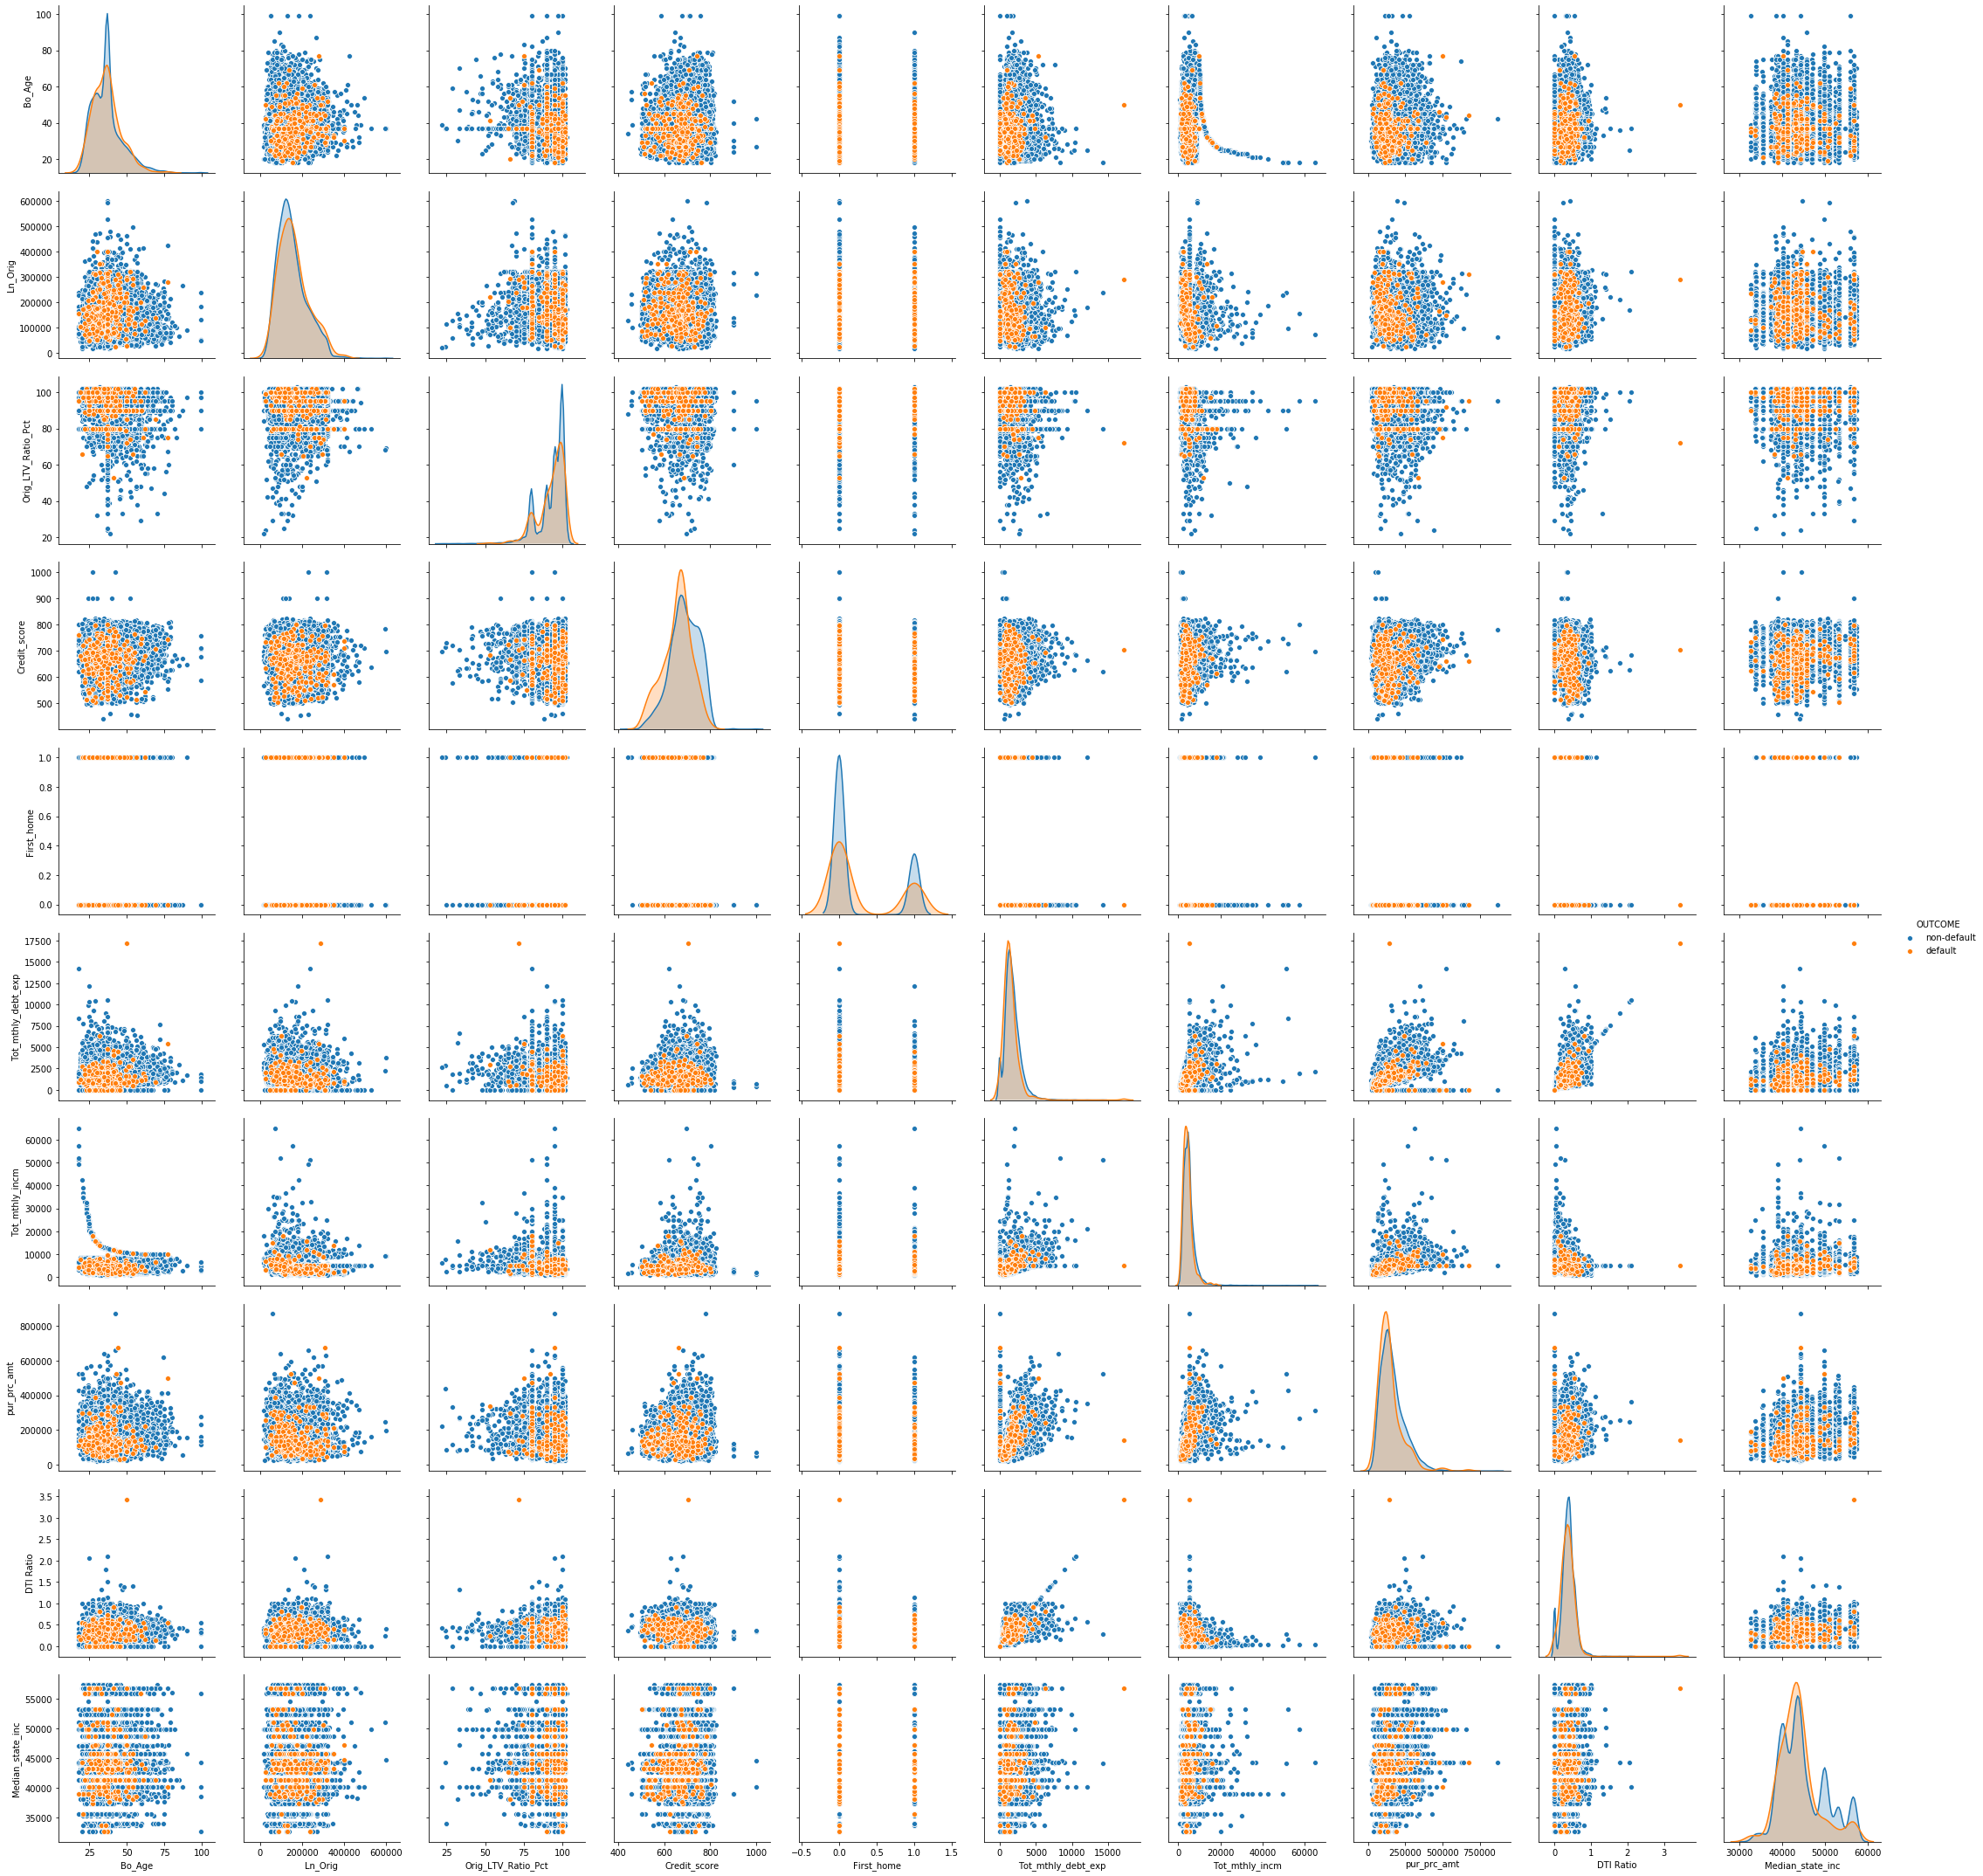

In [4]:
import seaborn as sns
sns.pairplot(data_vis, height=3, hue="OUTCOME")